In [259]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [262]:
df = pd.read_csv('data/train.csv')

In [263]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [239]:
X, y = df.drop('Survived', axis=1), df['Survived']

In [240]:
X.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [241]:
X.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,183.000000,183.000000,183,183,183.000000,183.000000,183.000000,183,183.000000,183,183
unique,NaN,NaN,183,2,NaN,NaN,NaN,127,NaN,133,3
top,NaN,NaN,"Bjornstrom-Steffansson, Mr. Mauritz Hakan",male,NaN,NaN,NaN,19950,NaN,B96 B98,S
freq,NaN,NaN,1,95,NaN,NaN,NaN,4,NaN,4,116
mean,455.366120,1.191257,NaN,NaN,35.674426,0.464481,0.475410,NaN,78.682469,NaN,NaN
std,247.052476,0.515187,NaN,NaN,15.643866,0.644159,0.754617,NaN,76.347843,NaN,NaN
min,2.000000,1.000000,NaN,NaN,0.920000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,263.500000,1.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,29.700000,NaN,NaN
50%,457.000000,1.000000,NaN,NaN,36.000000,0.000000,0.000000,NaN,57.000000,NaN,NaN
75%,676.000000,1.000000,NaN,NaN,47.500000,1.000000,1.000000,NaN,90.000000,NaN,NaN


In [124]:
X.Embarked.fillna('unk', inplace=True)
X.Sex.fillna('unk', inplace=True)
X.Pclass.fillna('unk', inplace=True)
X.Age.fillna(X.Age.mean(), inplace=True)
X.Fare.fillna(X.Fare[X.Pclass == 3].mean(), inplace=True)
X.SibSp.fillna(X.SibSp[X.Pclass == 3].mean(), inplace=True)
X.Parch.fillna(X.Parch[X.Pclass == 3].mean(), inplace=True)

In [242]:
X_no_pid = X.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [243]:
X_bin_sex = X_no_pid.copy()
X_bin_sex['Sex'] = (X_no_pid.Sex == 'female').apply(lambda x: int(x))

In [244]:
X_bin_sex.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,38.0,1,0,71.2833,C
3,1,1,35.0,1,0,53.1000,S
6,1,0,54.0,0,0,51.8625,S
10,3,1,4.0,1,1,16.7000,S
11,1,1,58.0,0,0,26.5500,S


In [245]:
X_bin_embk = X_bin_sex.copy()
X_embk_dumm = pd.get_dummies(X_bin_sex['Embarked'], prefix='embk')
X_bin_embk[X_embk_dumm.columns] = X_embk_dumm
X_bin_embk.drop('Embarked', axis=1, inplace=True)

In [246]:
X_bin_embk.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,embk_C,embk_Q,embk_S
1,1,1,38.0,1,0,71.2833,1,0,0
3,1,1,35.0,1,0,53.1000,0,0,1
6,1,0,54.0,0,0,51.8625,0,0,1
10,3,1,4.0,1,1,16.7000,0,0,1
11,1,1,58.0,0,0,26.5500,0,0,1


In [247]:
X_bin_cls = X_bin_embk.copy()
X_bin_cls['Pclass'] = X_bin_cls['Pclass'].apply(lambda x: str(x))
X_cls_dumm = pd.get_dummies(X_bin_cls['Pclass'], prefix='p_cls')
X_bin_cls[X_cls_dumm.columns] = X_cls_dumm
X_bin_cls.drop('Pclass', axis=1, inplace=True)

In [248]:
X_bin_cls.head()

,Sex,Age,SibSp,Parch,Fare,embk_C,embk_Q,embk_S,p_cls_1,p_cls_2,p_cls_3
1,1,38.0,1,0,71.2833,1,0,0,1,0,0
3,1,35.0,1,0,53.1000,0,0,1,1,0,0
6,0,54.0,0,0,51.8625,0,0,1,1,0,0
10,1,4.0,1,1,16.7000,0,0,1,0,0,1
11,1,58.0,0,0,26.5500,0,0,1,1,0,0


In [249]:
X_ar = X_bin_cls.values

In [250]:
X_ar

array([[ 1., 38.,  1., ...,  1.,  0.,  0.],
       [ 1., 35.,  1., ...,  1.,  0.,  0.],
       [ 0., 54.,  0., ...,  1.,  0.,  0.],
       ...,
       [ 1., 56.,  0., ...,  1.,  0.,  0.],
       [ 1., 19.,  0., ...,  1.,  0.,  0.],
       [ 0., 26.,  0., ...,  1.,  0.,  0.]])

In [251]:
y_ar = y.values

In [252]:
y_ar[:10]

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 0])

In [253]:
x_train, x_test, y_train, y_test = train_test_split(X_ar, y_ar, test_size=0.25)

In [254]:
X_ar.shape, y_ar.shape

((183, 11), (183,))

In [255]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((137, 11), (46, 11), (137,), (46,))

In [260]:
clf = LogisticRegressionCV()
# clf.fit(x_train, y_train)

In [257]:
clf.score(x_test, y_test)

0.8260869565217391

In [258]:
roc_auc_score(y_test, clf.predict_proba(x_test)[:, 1])

0.8468468468468469

In [148]:
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(x_test)[:, 1])

In [154]:
fpr_random, tpr_random, _ = roc_curve(y_test, [0.5]*y_test.shape[0])

Text(0,0.5,'True Positive Rate')

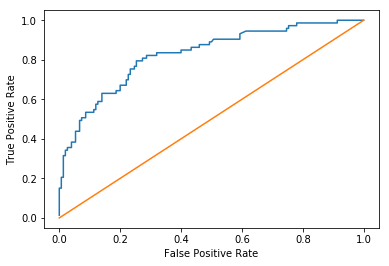

In [157]:
plt.plot(fpr, tpr)
plt.plot(fpr_random, tpr_random)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

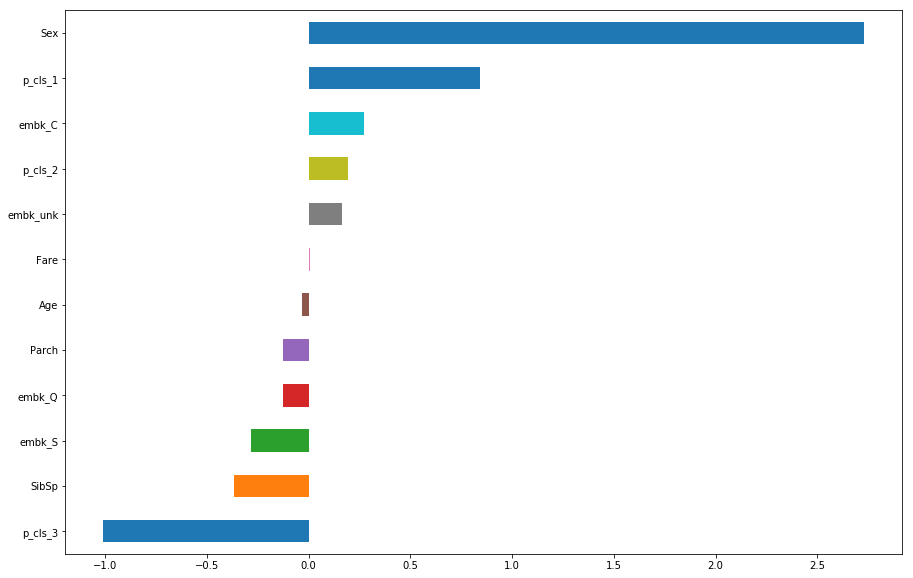

In [170]:
pd.Series(clf.coef_[0], index=X_bin_cls.columns).sort_values().plot(kind='barh', figsize=(15, 10))

In [163]:
for cn, c in zip(X_bin_cls.columns, clf.coef_[0]):
    print(f'Важность признака {cn}: {round(c, 2)}', )

Важность признака Sex: 2.73
Важность признака Age: -0.03
Важность признака SibSp: -0.37
Важность признака Parch: -0.13
Важность признака Fare: 0.01
Важность признака embk_C: 0.27
Важность признака embk_Q: -0.13
Важность признака embk_S: -0.28
Важность признака embk_unk: 0.16
Важность признака p_cls_1: 0.84
Важность признака p_cls_2: 0.19
Важность признака p_cls_3: -1.01


In [158]:
X_bin_cls.columns

Index(['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'embk_C', 'embk_Q', 'embk_S',
       'embk_unk', 'p_cls_1', 'p_cls_2', 'p_cls_3'],
      dtype='object')

In [171]:
check = np.zeros_like(X_bin_cls.columns)

In [219]:
check[0] = 0
check[1] = 20

In [220]:
check.shape

(12,)

In [221]:
check.reshape((1, -1))

array([[0, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=object)

In [222]:
print(f"Шансы выжить: {round(clf.predict_proba(check.reshape((1, -1)))[0, 1], 2)}")

Шансы выжить: 0.34


## Задание

### Первая половина оценки

Сделать такую модель, чтобы точность (accuracy) была выше, чем та, что есть сейчас.

В результате, мы посчитаем половину оценки следующим образом:

$$mark_{inclass} = ((accuracy_{predicted} - accuracy_{baseline}) - (1 - \frac{X.train.shape[0] + X.test.shape[0]}{X.original.shape[0]})) * 45$$

где

1. $X.train.shape$ - размер используемой Вами обучающей выборки 
2. $X.test.shape$ - размер используемой Вами тестовой выборки
3. $X.original.shape$ - размер сходной таблицы ($891 \times 12 $)
4. $accuracy_{baseline}$ - точность приведенная в примере
5. $accuracy_{predicted}$ - точность посчитанная Вашей моделью (Или вами, можете руками считать)

### Вторая половина оценки

Прогнать свое решение на тестовых данных и загрузить свое решение на [kaggle]. Тогда вторая половина оценки будет посчитана следующим образом:

$$mark_{inclass} = (\frac{accuracy_{kaggle}}{5}) * 45$$

### В итоге

После того, как работа будет выполнена, то надо будет оформить свою работу и либо показать ее в классе либо послать по почте. __Работы будут ожидаться до 23:50 следующей субботы без пенальти, после первой субботы будет пенальти mark * 0.5, а после 23:50 второй субботы работа будет оценена на 0 баллов__

Мы понимаем, что датасет очень заезженный и тут сложно сделать что-то оригинальное, но мы просим прявить смекалочку и попробовать набрать как можно больше баллов самим.

Хорошо оформленные работы с пояснениями будут оценены дополнительными бонусами 🤑



### Рекомендации
- Посмотреть на те признаки, что мы убрали, возможно среди них есть что-то полезное
    - Мб что-то с именами сделать?
- Подумать над тем, как мы заполняем пропуски
- Помедидитовать над важностью классов (?)
- Попробовать другие модели
- Поиграть с параметрами модели (рекомендуется кроссвалидация)
- Посмотреть в kernel-ы соревнования